# Assignment 1- Topics From Labs 1 & 2
  <a target="_blank" href="https://colab.research.google.com/github/andrew-nash/CS6421-labs-2025/blob/main/CS6421_Assignment_01.ipynb">
  <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/>
</a>

Due on  20/02/2025 at 23:59:59 UTC

In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Data Loading And Cleaning

For this lab, we will use a house pricing dataset (credit: https://www.kaggle.com/datasets/shree1992/housedata). However, instead of predicting house prices here, we are instead going to attempt to classity to condition of the property based on the other featues.

In [2]:
%%bash
wget -O data.csv https://github.com/andrew-nash/CS6421-labs-2025/raw/refs/heads/main/data.csv

--2025-02-15 12:39:57--  https://github.com/andrew-nash/CS6421-labs-2025/raw/refs/heads/main/data.csv
Resolving github.com (github.com)... 4.208.26.197
Connecting to github.com (github.com)|4.208.26.197|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/andrew-nash/CS6421-labs-2025/refs/heads/main/data.csv [following]
--2025-02-15 12:39:57--  https://raw.githubusercontent.com/andrew-nash/CS6421-labs-2025/refs/heads/main/data.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.110.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 526795 (514K) [text/plain]
Saving to: ‘data.csv’

     0K .......... .......... .......... .......... ..........  9% 3.08M 0s
    50K .......... .......... .......... .......... .......... 19% 34.9M 0s
   100K .......... ....

In [2]:
raw_data = pd.read_csv("data.csv")
raw_data

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-02 00:00:00,3.130000e+05,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,2014-05-02 00:00:00,2.384000e+06,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA
2,2014-05-02 00:00:00,3.420000e+05,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,2014-05-02 00:00:00,4.200000e+05,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA
4,2014-05-02 00:00:00,5.500000e+05,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4595,2014-07-09 00:00:00,3.081667e+05,3.0,1.75,1510,6360,1.0,0,0,4,1510,0,1954,1979,501 N 143rd St,Seattle,WA 98133,USA
4596,2014-07-09 00:00:00,5.343333e+05,3.0,2.50,1460,7573,2.0,0,0,3,1460,0,1983,2009,14855 SE 10th Pl,Bellevue,WA 98007,USA
4597,2014-07-09 00:00:00,4.169042e+05,3.0,2.50,3010,7014,2.0,0,0,3,3010,0,2009,0,759 Ilwaco Pl NE,Renton,WA 98059,USA
4598,2014-07-10 00:00:00,2.034000e+05,4.0,2.00,2090,6630,1.0,0,0,3,1070,1020,1974,0,5148 S Creston St,Seattle,WA 98178,USA


In [3]:
def get_seed_from_s_no(s_no):
  ### DO NOT CHANGE THIS FUNCION
  seeds = [[16, 81], [30, 18]]
  i = int(student_no%2==0)
  j = int(student_no%10<5)
  return seeds[i][j]

In [222]:
features = ["price","bedrooms","bathrooms","sqft_living","sqft_lot","floors","waterfront","view","sqft_above",	"sqft_basement",	"yr_built",	"yr_renovated"]

reduced_data = raw_data[features+['condition']]

# enter your student number here
student_no = 124101111

df = raw_data.sample(axis=1,frac=1, random_state=get_seed_from_s_no(student_no))

In [223]:
train_split = 0.85

x_train = df[features].to_numpy()[:int(train_split*len(df))]
y_train = df['condition'].to_numpy()[:int(train_split*len(df))]

x_test = df[features].to_numpy()[int(train_split*len(df)):]
y_test = df['condition'].to_numpy()[int(train_split*len(df)):]

(3910, 12)
(3910,)


In [224]:
# scaling the x valuee to [0,1] on each column
# is done as follows
# axis=0 means that the operation is performed accross each column
x_train_clean = (x_train-x_train.min(axis=0))/x_train.max(axis=0)

#### IMPORTATNT - observe that we scale by _train.min()
# when we are scaling the test dataset - why is this?
x_test_clean = (x_test-x_train.min(axis=0))/x_train.max(axis=0)

### Convert the y data to one hot encoding.
### There are 5 values for condition: 1,2,3,4,5
###
### If we want to use the tf.one_hot function then
### convert these to 0,1,2,3,4

y_train_clean = tf.one_hot(y_train-1, depth=5)
y_test_clean  = tf.one_hot(y_test-1, depth=5)

(690, 5)
690
(3910, 12)
[[0.03299115 0.33333333 0.1875     ... 0.         0.02730884 0.99553128]
 [0.32623009 0.55555556 0.3125     ... 0.05809129 0.01042701 0.        ]
 [0.03709735 0.33333333 0.25       ... 0.         0.03277061 0.        ]
 ...
 [0.02265487 0.33333333 0.21875    ... 0.         0.02979146 0.99900695]
 [0.01670796 0.44444444 0.21875    ... 0.21369295 0.03277061 0.        ]
 [0.06867257 0.44444444 0.3125     ... 0.1659751  0.03426018 0.        ]]



# Task 1: Hyper-parameter Optimzation

We will use the Keras tuner to partially automate this process (https://www.tensorflow.org/tutorials/keras/keras_tuner)

### Model Builder Function

The first step is to define a function over the hyper-parameters of interest, that returns the validation metrics.

We will then search over these arguments to find their optimal values.

For this task, you should search over the following hyper-parameters


| Hyper-Parameter | Min | Max |
| -- | -- | -- |
| No. Layers | 2 | 10 |
| Neurons in layer `i` | 10 | 750 |
| Regularization | 0.0001 | 0.1 |

<br>

| Hyper-Parameter | Choices |
|---|---|
| Activaiton | [relu, elu, sigmoid]|
| Type of Regularization | [L1,L2,L1L2] |
| Use BatchNorm | [True, False] |
| batch_size | [16,64,124] |
| Learning Rate | [0.01,0.001,0.001] |
| kernel_initializer |  ["glorot_normal","glorot_uniform", "zeros"] |
| bias_initializer |  ["zeros", "onesß"] |




In [ ]:
!pip install -U keras-tuner

In [ ]:
%load_ext tensorboard

In [7]:
import keras_tuner as kt

In [10]:
def task1_search_model_coarse(hp):
  model = tf.keras.models.Sequential()

  model.add(tf.keras.layers.Input(shape=(12,)))

  num_layers = hp.Int("num_layers", min_value=2, max_value=10, step=2)
  reg_type = hp.Choice("reg_type", ["L1", "L2", "L1L2"])
  reg_level = hp.Choice("reg_level", [0.0001, 0.001, 0.01, 0.1])

  act_fuc = hp.Choice("act_fuc", ["relu", "elu", "sigmoid"])

  for i in range(num_layers):
    neurons = hp.Int(f"num_neurons_layer_{i}", min_value=10, max_value=750, step=2, sampling='log')

    if reg_type == "L1":
      reg = tf.keras.regularizers.L1(l1=reg_level)
    elif reg_type == "L2":
      reg = tf.keras.regularizers.L2(l2=reg_level)
    else:
      reg = tf.keras.regularizers.L1L2(l1=reg_level, l2=reg_level)

    kernel_initializer = hp.Choice("kernel_initializer", ["glorot_normal","glorot_uniform", "zeros"])
    bias_initializer = hp.Choice("bias_initializer", ["zeros", "ones"])

    model.add(tf.keras.layers.Dense(neurons, activation=act_fuc,
                                    activity_regularizer = reg,
                                    kernel_initializer=kernel_initializer,
                                    bias_initializer=bias_initializer))

    add_batchnorm = hp.Boolean("add_batchnorm")
    if add_batchnorm:
      model.add(tf.keras.layers.BatchNormalization())


  model.add(tf.keras.layers.Dense(5, activation="softmax"))

  lr = hp.Choice("learning_rate", values=[0.01, 0.001, 0.0001])

  model.compile(
    optimizer= tf.keras.optimizers.Adam(learning_rate=lr),
    loss = "categorical_crossentropy",
    metrics = ["accuracy"]
  )

  return model


In [47]:
tuner = kt.RandomSearch(task1_search_model_coarse,
                        objective='val_accuracy',
                        max_trials=60,
                        seed=42,
                        overwrite=True,
                        directory="./hyp_searches/",
                        project_name="coarse_search_bs16")

In [48]:
tuner.search_space_summary()

Search space summary
Default search space size: 10
num_layers (Int)
{'default': None, 'conditions': [], 'min_value': 2, 'max_value': 10, 'step': 2, 'sampling': 'linear'}
reg_type (Choice)
{'default': 'L1', 'conditions': [], 'values': ['L1', 'L2', 'L1L2'], 'ordered': False}
reg_level (Choice)
{'default': 0.0001, 'conditions': [], 'values': [0.0001, 0.001, 0.01, 0.1], 'ordered': True}
act_fuc (Choice)
{'default': 'relu', 'conditions': [], 'values': ['relu', 'elu', 'sigmoid'], 'ordered': False}
num_neurons_layer_0 (Int)
{'default': None, 'conditions': [], 'min_value': 10, 'max_value': 750, 'step': 2, 'sampling': 'log'}
kernel_initializer (Choice)
{'default': 'glorot_normal', 'conditions': [], 'values': ['glorot_normal', 'glorot_uniform', 'zeros'], 'ordered': False}
bias_initializer (Choice)
{'default': 'zeros', 'conditions': [], 'values': ['zeros', 'ones'], 'ordered': False}
add_batchnorm (Boolean)
{'default': False, 'conditions': []}
num_neurons_layer_1 (Int)
{'default': None, 'condition

In [ ]:
%tensorboard --logdir "./hyp_searches/coarse_search_bs16"

In [49]:
tuner.search(
    x_train_clean,
    y_train_clean,

    validation_split = 0.8,
    batch_size=16,
    epochs=10,
    callbacks=[tf.keras.callbacks.TensorBoard("./hyp_searches/coarse_search_bs16/tb_logs")]
)

Trial 60 Complete [00h 00m 04s]
val_accuracy: 0.6321508288383484

Best val_accuracy So Far: 0.7043783664703369
Total elapsed time: 00h 04m 12s


In [50]:
tuner.get_best_hyperparameters()[0].values

{'num_layers': 4,
 'reg_type': 'L1L2',
 'reg_level': 0.0001,
 'act_fuc': 'elu',
 'num_neurons_layer_0': 320,
 'kernel_initializer': 'glorot_uniform',
 'bias_initializer': 'zeros',
 'add_batchnorm': False,
 'num_neurons_layer_1': 160,
 'learning_rate': 0.001,
 'num_neurons_layer_2': 640,
 'num_neurons_layer_3': 20,
 'num_neurons_layer_4': 80,
 'num_neurons_layer_5': 40,
 'num_neurons_layer_6': 80,
 'num_neurons_layer_7': 40,
 'num_neurons_layer_8': 160,
 'num_neurons_layer_9': 40}

### Search Over other Values of batch_size

In [53]:
tuner = kt.RandomSearch(task1_search_model_coarse,
                        objective='val_accuracy',
                        max_trials=60,
                        seed=42,
                        overwrite=True,
                        directory="./hyp_searches/",
                        project_name="coarse_search_bs64")

tuner.search(
    x_train_clean,
    y_train_clean,
    validation_split = 0.8,
    batch_size=64,
    epochs=10,
    callbacks=[tf.keras.callbacks.TensorBoard("./hyp_searches/coarse_search_bs64/tb_logs")]
)

Trial 60 Complete [00h 00m 06s]
val_accuracy: 0.6321508288383484

Best val_accuracy So Far: 0.6976670026779175
Total elapsed time: 00h 08m 06s


In [54]:
tuner.get_best_hyperparameters()[0].values

{'num_layers': 4,
 'reg_type': 'L1L2',
 'reg_level': 0.0001,
 'act_fuc': 'elu',
 'num_neurons_layer_0': 320,
 'kernel_initializer': 'glorot_uniform',
 'bias_initializer': 'zeros',
 'add_batchnorm': False,
 'num_neurons_layer_1': 160,
 'learning_rate': 0.001,
 'num_neurons_layer_2': 640,
 'num_neurons_layer_3': 20,
 'num_neurons_layer_4': 80,
 'num_neurons_layer_5': 40,
 'num_neurons_layer_6': 80,
 'num_neurons_layer_7': 40,
 'num_neurons_layer_8': 160,
 'num_neurons_layer_9': 40}

In [55]:
tuner = kt.RandomSearch(task1_search_model_coarse,
                        objective='val_accuracy',
                        max_trials=60,
                        seed=42,
                        overwrite=True,
                        directory="./hyp_searches/",
                        project_name="coarse_search_bs124")
tuner.search(
    x_train_clean,
    y_train_clean,
    validation_split = 0.8,
    batch_size=124,
    epochs=10,
    callbacks=[tf.keras.callbacks.TensorBoard("./hyp_searches/coarse_search_bs124/tb_logs")]
)

Trial 60 Complete [00h 00m 12s]
val_accuracy: 0.6321508288383484

Best val_accuracy So Far: 0.7046979665756226
Total elapsed time: 00h 11m 00s


In [56]:
tuner.get_best_hyperparameters()[0].values

{'num_layers': 8,
 'reg_type': 'L2',
 'reg_level': 0.0001,
 'act_fuc': 'elu',
 'num_neurons_layer_0': 10,
 'kernel_initializer': 'glorot_uniform',
 'bias_initializer': 'zeros',
 'add_batchnorm': False,
 'num_neurons_layer_1': 20,
 'learning_rate': 0.01,
 'num_neurons_layer_2': 320,
 'num_neurons_layer_3': 20,
 'num_neurons_layer_4': 320,
 'num_neurons_layer_5': 320,
 'num_neurons_layer_6': 40,
 'num_neurons_layer_7': 40,
 'num_neurons_layer_8': 320,
 'num_neurons_layer_9': 80}

### Continue Optimizing

Continue tuning this model.

**IMPORTANT** Marks will be awarded based on your model-tuning process. Make sure all model builder function names start with `task1_search_`

Based on the TensorBoard output above, you should be able to fix a few of the hyper-parameters (hint: such as the activation function).

Continue to perform additional hyper-parameter searches to narrow in on the optimal set of hyper-parameters. From the table above.

Don't just focus on taking the best validation accuracy - look at the TensorBoard outputs and try to find models that have good performance, but also minimal overfitting.



In [20]:
def task1_search_model_coarse_2(hp):
    '''Sigmoid function is not really required in this case because it's not zero centric and will saturate for 
    higher positive values. 
    For all the three different batch-size searches, the kernel initializer is giving better performance 
    with uniform and normal distributions rather than 0 initial values. 
    
    The bias when set to 1 can also be seen to overfit the data. Big difference between training and 
    validation accuracy '''
    model = tf.keras.models.Sequential()

    model.add(tf.keras.layers.Input(shape=(12,)))

    num_layers = hp.Int("num_layers", min_value=2, max_value=10, step=2)
    reg_type = hp.Choice("reg_type", ["L1", "L2", "L1L2"])
    reg_level = hp.Choice("reg_level", [0.0001, 0.001, 0.01, 0.1])
    
    act_fuc = hp.Choice("act_fuc", ["relu", "elu"])
    
    for i in range(num_layers):
        neurons = hp.Int(f"num_neurons_layer_{i}", min_value=10, max_value=750, step=2, sampling='log')
        
        if reg_type == "L1":
          reg = tf.keras.regularizers.L1(l1=reg_level)
        elif reg_type == "L2":
          reg = tf.keras.regularizers.L2(l2=reg_level)
        else:
          reg = tf.keras.regularizers.L1L2(l1=reg_level, l2=reg_level)
        
        kernel_initializer = hp.Choice("kernel_initializer", ["glorot_normal","glorot_uniform"])
        
        model.add(tf.keras.layers.Dense(neurons, activation=act_fuc,
                                        activity_regularizer = reg,
                                        kernel_initializer=kernel_initializer,
                                        bias_initializer="zeros"))
        
        add_batchnorm = hp.Boolean("add_batchnorm")
        if add_batchnorm:
          model.add(tf.keras.layers.BatchNormalization())
    
    
    model.add(tf.keras.layers.Dense(5, activation="softmax"))
    
    lr = hp.Choice("learning_rate", values=[0.01, 0.001, 0.0001])
    
    model.compile(
    optimizer= tf.keras.optimizers.Adam(learning_rate=lr),
    loss = "categorical_crossentropy",
    metrics = ["accuracy"]
    )
    return model

In [21]:
tuner = kt.RandomSearch(task1_search_model_coarse_2,
                        objective='val_accuracy',
                        max_trials=60,
                        seed=42,
                        overwrite=True,
                        directory="./hyp_searches/",
                        project_name="coarse_2_search_bs16")

In [ ]:
%tensorboard --logdir "./hyp_searches/coarse_2_search_bs16"

In [22]:
tuner.search(
    x_train_clean,
    y_train_clean,

    validation_split = 0.8,
    batch_size=16,
    epochs=10,
    callbacks=[tf.keras.callbacks.TensorBoard("./hyp_searches/coarse_2_search_bs16/tb_logs")]
)

Trial 60 Complete [00h 00m 07s]
val_accuracy: 0.6960690021514893

Best val_accuracy So Far: 0.710131049156189
Total elapsed time: 00h 09m 24s


In [23]:
tuner.get_best_hyperparameters()[0].values

{'num_layers': 6,
 'reg_type': 'L1L2',
 'reg_level': 0.0001,
 'act_fuc': 'elu',
 'num_neurons_layer_0': 40,
 'kernel_initializer': 'glorot_normal',
 'add_batchnorm': False,
 'num_neurons_layer_1': 160,
 'learning_rate': 0.01,
 'num_neurons_layer_2': 640,
 'num_neurons_layer_3': 160,
 'num_neurons_layer_4': 40,
 'num_neurons_layer_5': 80,
 'num_neurons_layer_6': 40,
 'num_neurons_layer_7': 40,
 'num_neurons_layer_8': 40,
 'num_neurons_layer_9': 640}

In [24]:
tuner = kt.RandomSearch(task1_search_model_coarse_2,
                        objective='val_accuracy',
                        max_trials=60,
                        seed=42,
                        overwrite=True,
                        directory="./hyp_searches/",
                        project_name="coarse_2_search_bs64")

In [ ]:
%tensorboard --logdir "./hyp_searches/coarse_2_search_bs64"

In [25]:
tuner.search(
    x_train_clean,
    y_train_clean,
    validation_split = 0.8,
    batch_size=64,
    epochs=10,
    callbacks=[tf.keras.callbacks.TensorBoard("./hyp_searches/coarse_2_search_bs64/tb_logs")]
)

Trial 60 Complete [00h 00m 12s]
val_accuracy: 0.6340683698654175

Best val_accuracy So Far: 0.7062959671020508
Total elapsed time: 00h 10m 03s


In [26]:
tuner.get_best_hyperparameters()[0].values

{'num_layers': 6,
 'reg_type': 'L1',
 'reg_level': 0.001,
 'act_fuc': 'elu',
 'num_neurons_layer_0': 40,
 'kernel_initializer': 'glorot_uniform',
 'add_batchnorm': False,
 'num_neurons_layer_1': 40,
 'learning_rate': 0.01,
 'num_neurons_layer_2': 20,
 'num_neurons_layer_3': 40,
 'num_neurons_layer_4': 320,
 'num_neurons_layer_5': 40,
 'num_neurons_layer_6': 80,
 'num_neurons_layer_7': 320,
 'num_neurons_layer_8': 40,
 'num_neurons_layer_9': 20}

In [27]:
tuner = kt.RandomSearch(task1_search_model_coarse_2,
                        objective='val_accuracy',
                        max_trials=60,
                        seed=42,
                        overwrite=True,
                        directory="./hyp_searches/",
                        project_name="coarse_2_search_bs124")

In [ ]:
%tensorboard --logdir "./hyp_searches/coarse_2_search_bs124"

In [28]:
tuner.search(
    x_train_clean,
    y_train_clean,
    validation_split = 0.8,
    batch_size=124,
    epochs=10,
    callbacks=[tf.keras.callbacks.TensorBoard("./hyp_searches/coarse_2_search_bs124/tb_logs")]
)

Trial 60 Complete [00h 00m 14s]
val_accuracy: 0.6347075700759888

Best val_accuracy So Far: 0.7037392258644104
Total elapsed time: 00h 13m 02s


In [29]:
tuner.get_best_hyperparameters()[0].values

{'num_layers': 6,
 'reg_type': 'L1',
 'reg_level': 0.001,
 'act_fuc': 'elu',
 'num_neurons_layer_0': 40,
 'kernel_initializer': 'glorot_uniform',
 'add_batchnorm': False,
 'num_neurons_layer_1': 40,
 'learning_rate': 0.01,
 'num_neurons_layer_2': 20,
 'num_neurons_layer_3': 40,
 'num_neurons_layer_4': 320,
 'num_neurons_layer_5': 40,
 'num_neurons_layer_6': 80,
 'num_neurons_layer_7': 320,
 'num_neurons_layer_8': 40,
 'num_neurons_layer_9': 20}

In [225]:
def task1_search_model_coarse_3(hp):
    ''' As per tensorboard, 10 layers aren't giving a significantly better performance. 4 and 6 number
    of layers seem to be performing good. We don't want a complex model as it will overfit. 
    Hence, we can choose from 4 to 8 layers without the step set as 2. 
    
    Batch-normalization is performing poorly. We can set it as false and 
    reduce the number of hyper-parameter combinations. 
    
    For regularization, we can reduce the choices to L1 and L1L2 since they are the best parameters among the three
    batch sizes from the previous hyperparameter tuning function. It can be seen in Tensorboard as well: L2 
    regularization gives big differences between the training and validation accuracies, mostly underfittings.
    
    Same goes for the regularization level as well. 0.001 and 0.0001 give better performance. Shortlisting these two.
    
    As for the learning rate, 0.001 and 0.01 seem to be the best ones. 0.0001 will result in convergence more slowly.'''
    model = tf.keras.models.Sequential()

    model.add(tf.keras.layers.Input(shape=(12,)))

    num_layers = hp.Int("num_layers", min_value=4, max_value=8)
    reg_type = hp.Choice("reg_type", ["L1", "L1L2"])
    reg_level = hp.Choice("reg_level", [0.0001, 0.001])
    
    act_fuc = hp.Choice("act_fuc", ["relu", "elu"])
    
    for i in range(num_layers):
        neurons = hp.Int(f"num_neurons_layer_{i}", min_value=10, max_value=750, step=2, sampling='log')
        reg = tf.keras.regularizers.L1(l1=reg_level) if reg_type == "L1" else tf.keras.regularizers.L1L2(l1=reg_level,
                                                                                                        l2=reg_level)
        
        kernel_initializer = hp.Choice("kernel_initializer", ["glorot_normal","glorot_uniform"])
        
        model.add(tf.keras.layers.Dense(neurons, activation=act_fuc,
                                        activity_regularizer = reg,
                                        kernel_initializer=kernel_initializer,
                                        bias_initializer="zeros"))
    
    
    model.add(tf.keras.layers.Dense(5, activation="softmax"))
    
    lr = hp.Choice("learning_rate", values=[0.01, 0.001])
    
    model.compile(
    optimizer= tf.keras.optimizers.Adam(learning_rate=lr),
    loss = "categorical_crossentropy",
    metrics = ["accuracy"]
    )
    return model

In [226]:
# finally, we can go ahead with a batch-size of 64 as it is neither too small not too big.
# the three different batch-sizes aren't resulting in a big difference in the performance. 

# Furthermore, having a small batch-size can result in a capturing the noise while a larger batch size can lead to
# convergence at a local minima and might not generalise well.
tuner = kt.RandomSearch(task1_search_model_coarse_3,
                        objective='val_accuracy',
                        max_trials=60,
                        seed=42,
                        overwrite=True,
                        directory="./hyp_searches/",
                        project_name="coarse_3_search_bs64")

In [ ]:
%tensorboard --logdir "./hyp_searches/coarse_3_search_bs64"

In [227]:
tuner.search(
    x_train_clean,
    y_train_clean,
    validation_split = 0.8,
    batch_size=64,
    epochs=10,
    callbacks=[tf.keras.callbacks.TensorBoard("./hyp_searches/coarse_3_search_bs64/tb_logs")]
)

Trial 60 Complete [00h 00m 24s]
val_accuracy: 0.6970278024673462

Best val_accuracy So Far: 0.7082135081291199
Total elapsed time: 00h 24m 26s


In [17]:
tuner.get_best_models()[0].summary()

/Users/lakshya/Library/CloudStorage/OneDrive-Personal/ucc_course_material/sem_2/cs6421/cs6421_env/lib/python3.12/site-packages/keras/src/saving/saving_lib.py:757: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 30 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 640)            │         8,320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         6,410 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │           110 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 80)             │           880 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 640)            │        51,840 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 10)             │         6,410 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 5)              │            55 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 74,025 (289.16 KB)

 Trainable params: 74,025 (289.16 KB)

 Non-trainable params: 0 (0.00 B)

In [228]:
best_params = tuner.get_best_hyperparameters()[0]
best_params.values

{'num_layers': 4,
 'reg_type': 'L1',
 'reg_level': 0.0001,
 'act_fuc': 'elu',
 'num_neurons_layer_0': 320,
 'kernel_initializer': 'glorot_normal',
 'num_neurons_layer_1': 80,
 'num_neurons_layer_2': 40,
 'num_neurons_layer_3': 20,
 'learning_rate': 0.01,
 'num_neurons_layer_4': 160,
 'num_neurons_layer_5': 10,
 'num_neurons_layer_6': 640,
 'num_neurons_layer_7': 160}

#### Evaluate

It is good practice when tuning these hyper-parameters to not use the test dataset for tuning - we will perform a separate split on our training data, and evaluate on the test dataset post-optimization


Once you are happy, define a Sequential model using the best parametrs extracted above.

Train it for 20 epochs (or fewer if you wish) and evalue its performance on the test dataset.

In [229]:
model = tuner.hypermodel.build(best_params)
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_7 (Dense)                 │ (None, 320)            │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 80)             │        25,680 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 40)             │         3,240 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 20)             │           820 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 5)              │           105 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 34,005 (132.83 KB)

 Trainable params: 34,005 (132.83 KB)

 Non-trainable params: 0 (0.00 B)

In [230]:
history = model.fit(
        x_train_clean,
        y_train_clean,
        epochs=20,
        batch_size=64,
        validation_data=(x_test_clean,y_test_clean)
)

Epoch 1/20
62/62 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.6204 - loss: 1.2203 - val_accuracy: 0.6565 - val_loss: 0.9805
Epoch 2/20
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6898 - loss: 0.8577 - val_accuracy: 0.6667 - val_loss: 1.0064
Epoch 3/20
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6939 - loss: 0.8402 - val_accuracy: 0.6435 - val_loss: 0.9466
Epoch 4/20
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6855 - loss: 0.8369 - val_accuracy: 0.6739 - val_loss: 0.8663
Epoch 5/20
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6924 - loss: 0.7979 - val_accuracy: 0.6797 - val_loss: 0.8255
Epoch 6/20
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7145 - loss: 0.7768 - val_accuracy: 0.6768 - val_loss: 0.8222
Epoch 7/20
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7017 - loss: 0.7766 - val_accuracy: 0.6304 - val_loss: 0.9016
Epoch 8/20
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6999 - loss: 0.7911 - val_accuracy: 0.6841 - val_loss:

In [231]:
model.save("./tas1_model.keras")

In [232]:
model.evaluate(x_test_clean, y_test_clean)

22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7306 - loss: 0.6970 


[0.7141361236572266, 0.7072463631629944]

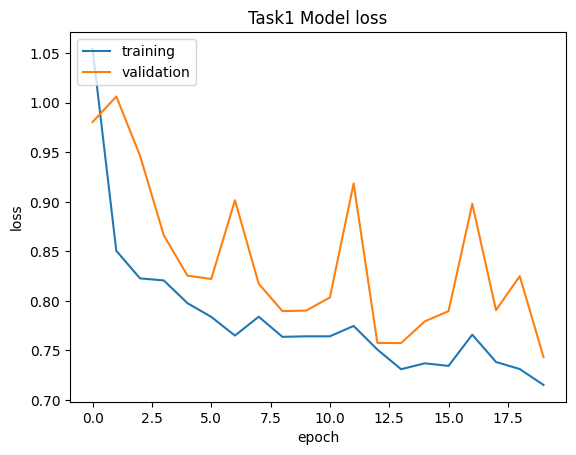

In [250]:
# plotting the training and validation loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['training', 'validation'], loc='upper left')
plt.title('Task1 Model loss')
plt.show()

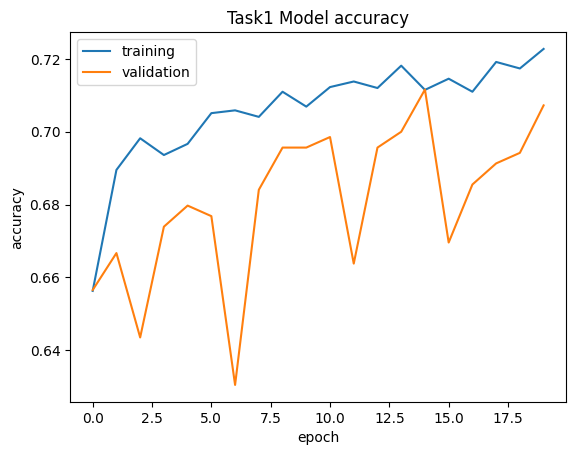

In [251]:
# plotting the training and validation accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend(['training', 'validation'], loc='upper left')
plt.title('Task1 Model accuracy')
plt.show()

In [269]:
# creating a confusion matrix to see the prediction performance
from sklearn.metrics import confusion_matrix
predicted_y = model.predict(x_test_clean)
# converting it back to the original y values
predicted_y = tf.math.argmax(predicted_y, axis=1) + 1
print("Confusion matrix for the test dataset: \n", confusion_matrix(y_true=y_test, y_pred=predicted_y))

'''class 1 and 2 aren't being correctly predicted at all because their values are quite less when compared to the other 
classes. Class 3 is being predicted correctly the most because it has the highes number of values in the training data
(63%. I have calculated this value in task 2). Class 4 is being incorrectly classified has class 3 more number of
times than being correctly classified. Class 5 is also being classified mostly as class 4 and class 3.'''

22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
Confusion matrix for the test dataset: 
 [[  0   0   0   1   0]
 [  0   0   0   5   0]
 [  0   0 381  32   2]
 [  0   0 101 100   5]
 [  0   0  11  45   7]]


In [268]:
class_counts = {int(_class): 0 for _class in np.unique(y_test)}
for value in y_test:
    class_counts[value] += 1
class_counts = {_class: round(count/len(y_test) * 100, 2) for _class, count in class_counts.items()}
print("Proportion of Y classes in the testing dataset: \n", class_counts)

class_counts = {int(_class): 0 for _class in np.unique(y_train).astype(int)}
for value in y_train:
    class_counts[value] += 1
class_counts = {_class: round(count/len(y_train) * 100, 2) for _class, count in class_counts.items()}
print("Proportion of Y classes in the training dataset: \n", class_counts)

Proportion of Y classes in the testing dataset: 
 {1: 0.14, 2: 0.72, 3: 60.14, 4: 29.86, 5: 9.13}
Proportion of Y classes in the training dataset: 
 {1: 0.13, 2: 0.69, 3: 62.92, 4: 26.75, 5: 9.51}


### Discussion

Explain, in a **short paragraph**

1. Some key observations you made in the hyper-parameter tuning.
2. If the evalutation on the test datset gave the results you expected, and why

In [ ]:
task1_explanation = '''
1) HYPER-PARAMETER TUNING OBSERVATIONS:
Since no features have any negative values, sigmoid function isn't really required as a choice of the activation
function. Moreover, it's not zero-centric and can lead to saturation for higher positive values. Hence, ReLU and eLU
are the better choices.
All the below mentioned points are based on checking the tensorboard dashboard:
1. For all the three different batch-size searches, the kernel initializer is giving better performance with uniform
and normal distributions rather than 0 initial values. 
2. The bias when set to 1 can also be seen to overfit the data as there were big differences between the 
training and validation accuracies. Hence, it can be initialised as 0
3. 10 layers aren't giving a significantly better performance. 4 and 6 number of layers seem to be performing good. 
We don't want a complex model as it will overfit. Hence, we can choose from 4 to 8 layers without the step set as 2.
In the end 4 layers seem to give the best performance.
4. For regularization, we can reduce the choices to L1 and L1L2 since they are the best parameters among the three
 batch sizes from the previous hyperparameter tuning function. It can be seen in Tensorboard as well: L2 
 regularization gives big differences between the training and validation accuracies, mostly underfittings.
5. Same goes for the regularization level as well. 0.001 and 0.0001 give better performance. Shortlisting these two.
6. As for the learning rate, 0.001 and 0.01 seem to be the best ones. 0.0001 will result in convergence more slowly.

2) TEST DATASET EVALUATION:
The model's training accuracy is 73% and the testing accuracy is 70.7%. The model is performing almost the same on 
training and testing dataset. This is because the distribution of the y classes is almost equal in both the training
and testing dataset. Most values are being classified as either class 3 or class 4 because they occupy the highest
amount of proportion in the dataset (around 60% of class 3 and around 28% of class 4 in both training and testing
datasets). This accuracy seems to be expected because of the highly skewed distribution of classes. The model's loss
is quickly minimized when it correctly detects class 3 and class 4 and hence, it learns to mostly detect these two
classes. As a result, all other classes are detected as class 3 and class 4 a lot of times. 
'''

## Task 2

Now, consider that unlike our image labels in the MNIST problems, the labels here are in fact ordinal data, existing on a discrete scale from 1-5.

### Re-process The Label Data to Prepare for a model that will predict a single value

Instead of one-hot encoding, now we must scale the y_train values (from [1,5]) to be between [0,1]

In [274]:
y_train_clean = (y_train-y_train.min(axis=0))/y_train.max(axis=0)
y_test_clean = (y_test-y_train.min(axis=0))/y_train.max(axis=0)

### Define a Custom Accruacy Function

Since our model predicts a single scalar value to predict discrete ordinal classes, TensorFlow cannot directly assign a class to a prediction itself.

The loss can still be computed as normal, but it means that we will need to define the accuracy metric ourselves.

\begin{equation}
  f_\text{acc}(y_\text{true},y_\text{pred})=   
  \begin{cases}
  1& \text{if}\; round( 5* y_\text{true})=round( 5* y_\text{pred}) \\
  0& \text{otherwise}
\end{cases}
\end{equation}

Hint: use the tf.math.round() and tf.equal()
function


In [276]:
def accuracy(y_true, y_pred):
    '''As per the Keras documentation, input tensors will be of shape (batch_size, 1). 
    Custom metric function should return a value of the shape (batch_size, ), i.e., one value for each 
    sample in the input batch. Hence, using the reshape function to remove the last dimension of 1 in our case'''
    return tf.reshape(tf.cast(tf.math.round(5*y_true) == tf.math.round(5*y_pred), tf.float32), [-1])

# an ordinal loss function that penalizes bigger differences more
def ordinal_loss(y_true, y_pred):
    return tf.reduce_mean(tf.abs(y_true - y_pred) ** 2, axis=-1)

### Optimize the hyper-parameters Similarly To task 1

You do not start from scratch, use a range of hyper-parameters that are close to the optimal values found in task 1.


**REMEMBER** that you must change the **output layer** from 12 to 1 neuron, and change the **loss function**. Also, think about what activation function is most appropiate for this output layer.

In [90]:
def task2_search_model_coarse(hp):
    ''' we can use a sigmoid function for our output layer because we are looking for continuous values
    from 0 to 1. 
    The RMSE function defined above can be used as the loss function since we will get continuous values and
    we can treat it like regression.
    
    This time I will try using batch normalization after every alternate layer because our network is not too big.
    
    Taking the regularization values from the previous task's latest function.'''
    model = tf.keras.models.Sequential()
    
    model.add(tf.keras.layers.Input(shape=(12,)))
    
    num_layers = hp.Int("num_layers", min_value=2, max_value=10, step=2)
    reg_type = hp.Choice("reg_type", ["L1", "L2", "L1L2"])
    reg_level = hp.Choice("reg_level", [0.0001, 0.001])
    
    act_fuc = hp.Choice("act_fuc", ["relu", "elu"])
    add_batchnorm = hp.Boolean("add_batchnorm") 
    
    for i in range(num_layers):
        neurons = hp.Int(f"num_neurons_layer_{i}", min_value=10, max_value=750, step=2, sampling='log')
        
        if reg_type == "L1":
            reg = tf.keras.regularizers.L1(l1=reg_level)
        elif reg_type == "L2":
            reg = tf.keras.regularizers.L2(l2=reg_level)
        else:
            reg = tf.keras.regularizers.L1L2(l1=reg_level, l2=reg_level)
        
        kernel_initializer = hp.Choice("kernel_initializer", ["glorot_normal","glorot_uniform"])        
        model.add(tf.keras.layers.Dense(neurons, activation=act_fuc,
                                        activity_regularizer = reg,
                                        kernel_initializer=kernel_initializer,
                                        bias_initializer="zeros"))
        
        # batch norm after every alternate layer
        if add_batchnorm and i%2 == 0:
            model.add(tf.keras.layers.BatchNormalization())
    
    
    model.add(tf.keras.layers.Dense(1, activation="sigmoid"))
    
    lr = hp.Choice("learning_rate", values=[0.01, 0.001])
    
    model.compile(
    optimizer= tf.keras.optimizers.Adam(learning_rate=lr),
    loss = "mse",
    metrics = [accuracy]
    )
    return model

In [91]:
tuner = kt.RandomSearch(task2_search_model_coarse,
                        objective='val_accuracy',
                        max_trials=60,
                        seed=42,
                        overwrite=True,
                        directory="./hyp_searches/",
                        project_name="task2_coarse_1_search_bs64")

In [ ]:
%tensorboard --logdir "./hyp_searches/task2_coarse_1_search_bs64"

In [132]:
tuner.search(
    x_train_clean,
    y_train_clean,
    validation_split = 0.8,
    batch_size=64,
    epochs=10,
    callbacks=[tf.keras.callbacks.TensorBoard("./hyp_searches/task2_coarse_1_search_bs64/tb_logs")]
)

Trial 60 Complete [00h 00m 14s]
val_accuracy: 0.6110659837722778

Best val_accuracy So Far: 0.6321508288383484
Total elapsed time: 00h 19m 44s


In [145]:
best_params = tuner.get_best_hyperparameters()[0]
best_params.values

{'num_layers': 8,
 'reg_type': 'L1',
 'reg_level': 0.0001,
 'act_fuc': 'relu',
 'add_batchnorm': False,
 'num_neurons_layer_0': 40,
 'kernel_initializer': 'glorot_uniform',
 'num_neurons_layer_1': 10,
 'learning_rate': 0.01,
 'num_neurons_layer_2': 10,
 'num_neurons_layer_3': 10,
 'num_neurons_layer_4': 10,
 'num_neurons_layer_5': 10,
 'num_neurons_layer_6': 10,
 'num_neurons_layer_7': 10}

In [146]:
model = tuner.hypermodel.build(best_params)


In [ ]:
%tensorboard --logdir "./model_fit/task2_coarse_1_search_bs64"

In [147]:
model.fit(
    x_train_clean,
    y_train_clean,
    epochs=10,
    batch_size=64,
    validation_data=(x_test_clean,y_test_clean),
    callbacks=[tf.keras.callbacks.TensorBoard("./model_fit/task2_coarse_1_search_bs64/tb_logs", histogram_freq=1)]
)

Epoch 1/20
62/62 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.5954 - loss: 0.0264 - val_accuracy: 0.6014 - val_loss: 0.0182
Epoch 2/20
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6345 - loss: 0.0179 - val_accuracy: 0.6014 - val_loss: 0.0182
Epoch 3/20
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5621 - loss: 0.0188 - val_accuracy: 0.6014 - val_loss: 0.0182
Epoch 4/20
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5497 - loss: 0.0191 - val_accuracy: 0.6014 - val_loss: 0.0183
Epoch 5/20
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6349 - loss: 0.0184 - val_accuracy: 0.6014 - val_loss: 0.0182
Epoch 6/20
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6307 - loss: 0.0186 - val_accuracy: 0.6014 - val_loss: 0.0183
Epoch 7/20
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6220 - loss: 0.0187 - val_accuracy: 0.6014 - val_loss: 0.0183
Epoch 8/20
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6272 - loss: 0.0184 - val_accuracy: 0.6014 - val_loss:

In [92]:
def task2_search_model_coarse_2(hp):
    ''' keeping only L1 and L1L2 regularizations this time.
    checking more layers from 4 to 10 without step size as 2
    setting up the kernel initializer as glorot_uniform as per the last optimization
    adding batchnorm as per the last optimization. '''
    
    model = tf.keras.models.Sequential()
    
    model.add(tf.keras.layers.Input(shape=(12,)))
    
    num_layers = hp.Int("num_layers", min_value=4, max_value=10)
    reg_type = hp.Choice("reg_type", ["L1", "L1L2"])
    reg_level = hp.Choice("reg_level", [0.0001, 0.001])
    
    act_fuc = hp.Choice("act_fuc", ["relu", "elu"])
    
    for i in range(num_layers):
        neurons = hp.Int(f"num_neurons_layer_{i}", min_value=10, max_value=750, step=2, sampling='log')
        
        if reg_type == "L1":
            reg = tf.keras.regularizers.L1(l1=reg_level)
        else:
            reg = tf.keras.regularizers.L1L2(l1=reg_level, l2=reg_level)
        
        model.add(tf.keras.layers.Dense(neurons, activation=act_fuc,
                                        activity_regularizer = reg,
                                        kernel_initializer="glorot_uniform",
                                        bias_initializer="zeros"))
        
        # batch norm after every alternate layer
        if i%2 == 0:
            model.add(tf.keras.layers.BatchNormalization())
    
    
    model.add(tf.keras.layers.Dense(1, activation="sigmoid"))
    
    lr = hp.Choice("learning_rate", values=[0.01, 0.001, 0.0001])
    
    model.compile(
    optimizer= tf.keras.optimizers.Adam(learning_rate=lr),
    loss = "mse",
    metrics = [accuracy]
    )
    return model

In [93]:
tuner = kt.RandomSearch(task2_search_model_coarse_2,
                        objective='val_accuracy',
                        max_trials=60,
                        seed=42,
                        overwrite=True,
                        directory="./hyp_searches/",
                        project_name="task2_coarse_2_search_bs32")

In [ ]:
%tensorboard --logdir "./hyp_searches/task2_coarse_2_search_bs32"

In [94]:
# trying with batch size 32 this time
tuner.search(
    x_train_clean,
    y_train_clean,
    validation_split = 0.8,
    batch_size=32,
    epochs=10,
    callbacks=[tf.keras.callbacks.TensorBoard("./hyp_searches/task2_coarse_2_search_bs32/tb_logs")]
)
# the best val_accuracy shown during hyperparameter tuning is 0.632 -> 63.2%

Trial 60 Complete [00h 00m 08s]
val_accuracy: 0.2733984887599945

Best val_accuracy So Far: 0.6322071552276611
Total elapsed time: 00h 07m 06s


In [95]:
best_params = tuner.get_best_hyperparameters()[0]
best_params.values

{'num_layers': 5,
 'reg_type': 'L1L2',
 'reg_level': 0.001,
 'act_fuc': 'elu',
 'num_neurons_layer_0': 10,
 'num_neurons_layer_1': 640,
 'num_neurons_layer_2': 10,
 'num_neurons_layer_3': 160,
 'learning_rate': 0.01,
 'num_neurons_layer_4': 40,
 'num_neurons_layer_5': 80,
 'num_neurons_layer_6': 640,
 'num_neurons_layer_7': 80}

In [96]:
# building model
model = tuner.hypermodel.build(best_params)

In [103]:
history = model.fit(
    x_train_clean,
    y_train_clean,
    epochs=20,
    batch_size=32,
    validation_data=(x_test_clean,y_test_clean)
)

Epoch 1/20
123/123 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4970 - loss: 0.0463 - val_accuracy: 0.4024 - val_loss: 0.0595
Epoch 2/20
123/123 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4816 - loss: 0.0452 - val_accuracy: 0.2306 - val_loss: 0.0914
Epoch 3/20
123/123 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.4865 - loss: 0.0484 - val_accuracy: 0.4305 - val_loss: 0.0558
Epoch 4/20
123/123 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.4854 - loss: 0.0433 - val_accuracy: 0.2393 - val_loss: 0.0836
Epoch 5/20
123/123 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.4743 - loss: 0.0451 - val_accuracy: 0.2894 - val_loss: 0.0830
Epoch 6/20
123/123 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.4949 - loss: 0.0481 - val_accuracy: 0.5987 - val_loss: 0.0748
Epoch 7/20
123/123 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.4799 - loss: 0.0482 - val_accuracy: 0.0600 - val_loss: 0.1357
Epoch 8/20
123/123 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.4823 - loss: 0.0466 - val_accuracy: 0.

In [106]:
print(model.evaluate(x_test_clean, y_test_clean))
# the model is performing poorly on the test dataset. The accuracy is around 49%. Poorer than the task1 model.


22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 999us/step - accuracy: 0.4956 - loss: 0.0594
[0.05874769762158394, 0.488455206155777]


In [109]:
# saving the model first
model.save("./task2_model_1.keras")

In [271]:
model = tf.keras.models.load_model("./task2_model_1.keras", custom_objects={'accuracy': accuracy})

In [284]:
# function that returns a confusion matrix
def get_confusion_matrix(y_true, y_pred, labels):
    from sklearn.metrics import confusion_matrix
    return confusion_matrix(y_true, y_pred, labels=labels)

In [285]:
class_counts = {int(_class): 0 for _class in np.unique(y_train)}
for value in y_train:
    class_counts[value] += 1
class_counts = {_class: round(count/len(y_train) * 100, 2) for _class, count in class_counts.items()}
print(class_counts)
# 0.4 (class 3) coveres 63% of the entire training dataset which is almost the same as the epoch accuracy during tuning!
# Class 1 and 2 (0 and 0.2) are only 0.12% and 0.7%! Class distribution is highly skewed.
predicted_y_train = np.round(model.predict(x_train_clean) * 5).astype(int) + 1
print("Confusion matrix of the Y training dataset: \n",
      get_confusion_matrix(y_train, predicted_y_train, [1, 2, 3, 4, 5]))

{1: 0.13, 2: 0.69, 3: 62.92, 4: 26.75, 5: 9.51}
123/123 ━━━━━━━━━━━━━━━━━━━━ 0s 450us/step
Confusion matrix of the Y training dataset: 
 [[   0    0    0    5    0]
 [   0    0    4   23    0]
 [   0    0 1945  515    0]
 [   0    0  366  680    0]
 [   0    0   29  343    0]]


In [95]:
# from the above it is clear why the model is not performing well. It is wrongly classifying almost every class as 
# class 3 or class 4! This is because class 3 is present the highest amount of time (by a lot that too) and 
# class 4 is second highest. The loss gets minimized a lot of times when the model correctly classifies the class 3
# or 4. Hence, it has learnt to classify almost everything as 3. We can try assigning class weights to the MSE loss 
# function. Higher weights will be assigned to classes which occupy less percentage of the data. 
# This way missclassification of these classes will result in a higher error!

In [309]:
# calculating weights for weighted mean squared error due to the skewed class ditribution
from sklearn.utils.class_weight import compute_class_weight

class_weights = compute_class_weight('balanced', classes=np.unique(y_train_clean), y=y_train_clean)
class_weights_dict = {float(cls): round(float(weight),2) 
                      for cls, weight in zip(np.unique(y_train_clean), class_weights)}
print(class_weights_dict)

{0.0: 156.4, 0.2: 28.96, 0.4: 0.32, 0.6: 0.75, 0.8: 2.1}


In [294]:
def weighted_mse(y_true, y_pred):
    # hard-coding the weights given by sklearn in the previous cell
    weights = tf.where(y_true == 0, 156.4, tf.where(y_true == 0.2, 28.96, 
                                                    tf.where(y_true == 0.4, 0.32, 
                                                                         tf.where(y_true == 0.6, 0.75, 2.1))))
    error = tf.square(y_true - y_pred)
    weighted_error = error * weights
    return tf.reduce_mean(weighted_error, axis=-1)

In [295]:
def task2_search_model_coarse_3(hp):
    '''passing the loss function as weighted_mse this time'''
    
    model = tf.keras.models.Sequential()
    
    model.add(tf.keras.layers.Input(shape=(12,)))
    
    num_layers = hp.Int("num_layers", min_value=4, max_value=10)
    reg_type = hp.Choice("reg_type", ["L1", "L1L2"])
    reg_level = hp.Choice("reg_level", [0.0001, 0.001])
    
    act_fuc = hp.Choice("act_fuc", ["relu", "elu"])
    
    for i in range(num_layers):
        neurons = hp.Int(f"num_neurons_layer_{i}", min_value=10, max_value=750, step=2, sampling='log')
        
        if reg_type == "L1":
            reg = tf.keras.regularizers.L1(l1=reg_level)
        else:
            reg = tf.keras.regularizers.L1L2(l1=reg_level, l2=reg_level)
        
        model.add(tf.keras.layers.Dense(neurons, activation=act_fuc,
                                        activity_regularizer = reg,
                                        kernel_initializer="glorot_uniform",
                                        bias_initializer="zeros"))
        
        # batch norm after every alternate layer
        if i%2 == 0:
            model.add(tf.keras.layers.BatchNormalization())
    
    
    model.add(tf.keras.layers.Dense(1, activation="sigmoid"))
    
    lr = hp.Choice("learning_rate", values=[0.01, 0.001, 0.0001])
    
    model.compile(
    optimizer= tf.keras.optimizers.Adam(learning_rate=lr),
    loss = weighted_mse,
    metrics = [accuracy]
    )
    return model

In [296]:
tuner = kt.RandomSearch(task2_search_model_coarse_3,
                        objective='val_accuracy',
                        max_trials=60,
                        seed=42,
                        overwrite=True,
                        directory="./hyp_searches/",
                        project_name="task2_coarse_3_search_bs32")

In [ ]:
%tensorboard --logdir "./hyp_searches/task2_coarse_3_search_bs32"

In [297]:
tuner.search(
    x_train_clean,
    y_train_clean,
    validation_split = 0.8,
    batch_size=32,
    epochs=10,
    callbacks=[tf.keras.callbacks.TensorBoard("./hyp_searches/task2_coarse_3_search_bs32/tb_logs")]
)
# the best val_accuracy shown during hyperparameter tuning is 0.632 -> 63.2%

Trial 60 Complete [00h 00m 33s]
val_accuracy: 0.44800055027008057

Best val_accuracy So Far: 0.6322071552276611
Total elapsed time: 00h 47m 21s


In [298]:
best_params = tuner.get_best_hyperparameters()[0]
best_params.values

{'num_layers': 5,
 'reg_type': 'L1L2',
 'reg_level': 0.001,
 'act_fuc': 'elu',
 'num_neurons_layer_0': 10,
 'num_neurons_layer_1': 640,
 'num_neurons_layer_2': 10,
 'num_neurons_layer_3': 160,
 'learning_rate': 0.01,
 'num_neurons_layer_4': 40,
 'num_neurons_layer_5': 80,
 'num_neurons_layer_6': 640,
 'num_neurons_layer_7': 80}

In [299]:
model = tuner.hypermodel.build(best_params)

In [303]:
history_2 = model.fit(
        x_train_clean,
        y_train_clean,
        epochs=20,
        batch_size=32,
        validation_data=(x_test_clean,y_test_clean)
    )

Epoch 1/20
123/123 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4482 - loss: 0.1240 - val_accuracy: 0.5328 - val_loss: 0.2232
Epoch 2/20
123/123 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3947 - loss: 0.1608 - val_accuracy: 0.4817 - val_loss: 0.2071
Epoch 3/20
123/123 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5786 - loss: 0.1982 - val_accuracy: 0.5337 - val_loss: 0.1789
Epoch 4/20
123/123 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5833 - loss: 0.1226 - val_accuracy: 0.6013 - val_loss: 0.1573
Epoch 5/20
123/123 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5981 - loss: 0.1415 - val_accuracy: 0.5934 - val_loss: 0.1400
Epoch 6/20
123/123 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6089 - loss: 0.1140 - val_accuracy: 0.5188 - val_loss: 0.1227
Epoch 7/20
123/123 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5649 - loss: 0.1125 - val_accuracy: 0.5943 - val_loss: 0.1316
Epoch 8/20
123/123 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5859 - loss: 0.1207 - val_accuracy: 0.

In [304]:
model.evaluate(x_test_clean, y_test_clean)
# the model accuracy is slightly better with the weighted MSE loss - 60%

22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6362 - loss: 0.1858 


[0.1969432383775711, 0.5994594097137451]

In [306]:
model.save("./task2_model_2.keras")

In [288]:
model = tf.keras.models.load_model("./task2_model_2.keras", custom_objects={'weighted_mse': weighted_mse,
                                                                            'accuracy': accuracy})

In [308]:
# training data classification
predicted_y = np.round(model.predict(x_test_clean) * 5).astype(int) + 1
print("Confusion matrix of the testing dataset for model 2: \n", 
      get_confusion_matrix(y_test, predicted_y, [1, 2, 3, 4, 5]))
# almost everything classified as 3

22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step
Confusion matrix of the testing dataset for model 2: 
 [[  0   0   1   0   0]
 [  0   0   5   0   0]
 [  0   1 413   1   0]
 [  0   0 205   0   1]
 [  0   0  63   0   0]]


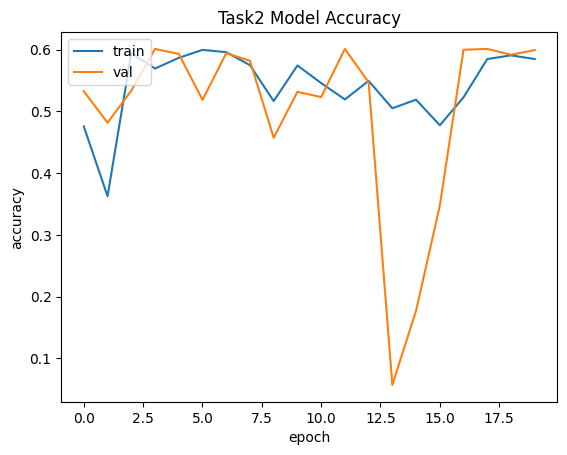

In [305]:
plt.plot(history_2.history['accuracy'])
plt.plot(history_2.history['val_accuracy'])
plt.title('Task2 Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()
# accuracy is not really increasing properly with the number of epochs.

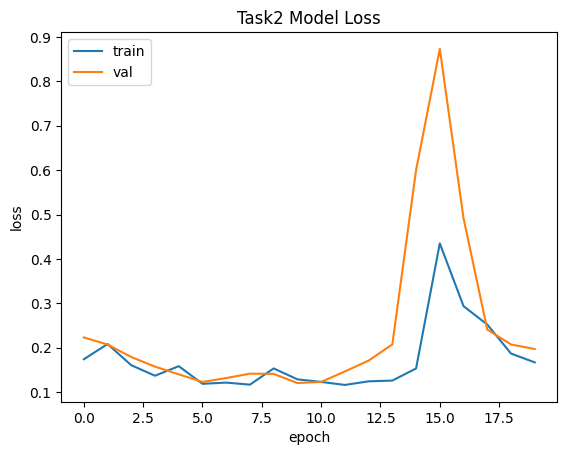

In [307]:
plt.plot(history_2.history['loss'])
plt.plot(history_2.history['val_loss'])
plt.title('Task2 Model Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()
# loss isn't decreasing with the number of epochs. 

## Compare the models from Task 1 and Task 2

Which is better, and why do you think this is the case? Are these results what you expected? Explain in no more than 10 sentences.

In [ ]:
final_explanation =  '''
  The model from Task 1 is better than the model from Task 2. This is because of the following reasons:
  
  1. The validation and training accuracy of task 1's model is better than task 2's model. That being said, both the
      models are mostly classifying the Y values as 3 or 4. Model 1 does a better job as per the confusion matrix 
      above. It still correctly classifies a lot of values however, the model from task 2 only classifies class 3
      correctly. 
  2. The incorrect classifications are because of the extreme skewed distribution of the Y values. The training 
      dataset has around 63% of values as 3 and 27% of values as 4. As a result, the models learn to classify almost everything as either 3 or 4 because correctly classifying 3 and 4 reduces their loss
      function significantly due to the sheer amount of values.
  3. The training accuracy and loss of model 2 don't improve with the number of epochs either. The graph is almost
      stationary with a lot of spikes. However, model 1's accuracy and loss can be seen improving with the number of
      epochs.

The result is expected because in task 2 we are treating the problem as regression with only one neuron in the final
layer with a sigmoid function to generate continuous values. The regression loss functions like MSE and weighted MSE
aren't helpful in this classification. We are looking for discrete values rather than continuous values.
Hence, even though the Y variable is ordinal, Softmax output layer with 5 neurons is doing a better job by generating
each value's probabilities.
'''